In [86]:
from filterpy.kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# kf = KalmanFilter(dim_x=7, dim_z=4) 
kf = KalmanFilter(dim_x=2, dim_z=2) 

In [87]:
def convert_x_to_bbox(x,score=None):
  """
  Takes a bounding box in the centre form [x,y,s,r] and returns it in the form
    [x1,y1,x2,y2] where x1,y1 is the top left and x2,y2 is the bottom right
  """
  w = np.sqrt(x[2] * x[3])
  h = x[2] / w
  if(score==None):
    return np.array([x[0]-w/2.,x[1]-h/2.,x[0]+w/2.,x[1]+h/2.]).reshape((1,4))
  else:
    return np.array([x[0]-w/2.,x[1]-h/2.,x[0]+w/2.,x[1]+h/2.,score]).reshape((1,5))



In [112]:
bbox=[0,0,1,1]

In [113]:
kf = KalmanFilter(dim_x=7, dim_z=4) 
kf.F = np.array([[1,0,0,0,1,0,0],[0,1,0,0,0,1,0],[0,0,1,0,0,0,1],[0,0,0,1,0,0,0],  [0,0,0,0,1,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,1]])
kf.H = np.array([[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0]])

kf.R[2:,2:] *= 10.
kf.P[4:,4:] *= 1000. #give high uncertainty to the unobservable initial velocities
kf.P *= 10.
kf.Q[-1,-1] *= 0.01
kf.Q[4:,4:] *= 0.01

kf.x[:4] = convert_bbox_to_z(bbox)

In [70]:
kf

KalmanFilter object
dim_x = 7
dim_z = 4
dim_u = 0
x = [[0.5 0.5 1.  1.  0.  0.  0. ]].T
P = [[   10.     0.     0.     0.     0.     0.     0.]
     [    0.    10.     0.     0.     0.     0.     0.]
     [    0.     0.    10.     0.     0.     0.     0.]
     [    0.     0.     0.    10.     0.     0.     0.]
     [    0.     0.     0.     0. 10000.     0.     0.]
     [    0.     0.     0.     0.     0. 10000.     0.]
     [    0.     0.     0.     0.     0.     0. 10000.]]
x_prior = [[0. 0. 0. 0. 0. 0. 0.]].T
P_prior = [[1. 0. 0. 0. 0. 0. 0.]
           [0. 1. 0. 0. 0. 0. 0.]
           [0. 0. 1. 0. 0. 0. 0.]
           [0. 0. 0. 1. 0. 0. 0.]
           [0. 0. 0. 0. 1. 0. 0.]
           [0. 0. 0. 0. 0. 1. 0.]
           [0. 0. 0. 0. 0. 0. 1.]]
x_post = [[0. 0. 0. 0. 0. 0. 0.]].T
P_post = [[1. 0. 0. 0. 0. 0. 0.]
          [0. 1. 0. 0. 0. 0. 0.]
          [0. 0. 1. 0. 0. 0. 0.]
          [0. 0. 0. 1. 0. 0. 0.]
          [0. 0. 0. 0. 1. 0. 0.]
          [0. 0. 0. 0. 0. 1. 0.]
         

In [71]:
print(kf.update(convert_bbox_to_z(bbox)))

None


In [60]:
print(kf.predict())

None


In [59]:
print(kf.update([2,2,3,3]))

None


In [72]:
convert_x_to_bbox(kf.x)

array([[0., 0., 1., 1.]])

In [ ]:
# plt.plot(past_index[:, 0], past_index[:, 1], c='blue', marker='o', markersize=3)
# plt.plot(gt_index[:, 0], gt_index[:, 1], c='green', marker='o', markersize=3)
# plt.plot(pred_index[:, 0], pred_index[:, 1], c='red', linewidth=1, marker='o', markersize=3)

2
3
4
5
6


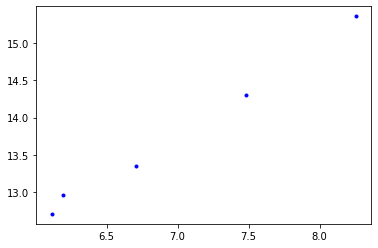

In [116]:
for i in range (2,7):
    print(i)
    kf.update([i+10,i+10,i+10,i+10])
    kf.predict()
    bb_New=convert_x_to_bbox(kf.x)
    plt.plot(bb_New[0][0],bb_New[0][1], c='blue', marker='o', markersize=3)
#     plt.show()
    

In [77]:
bb_New

array([[-1.47237874, 16.31252646, 35.13351778, 17.34861258]])